In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

/kaggle/input/diabetescsv/diabetes.csv


In [ ]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [3]:
df = pd.read_csv('dataset/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.describe() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# Glucose BloodPressure SkinThinkness Insulin BMI not be zero so replace with mean 
df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())

In [7]:
df['Outcome'].value_counts() # imblance dataset

Outcome
0    500
1    268
Name: count, dtype: int64

In [8]:
# split data into dependent and independent variable
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

<Axes: >

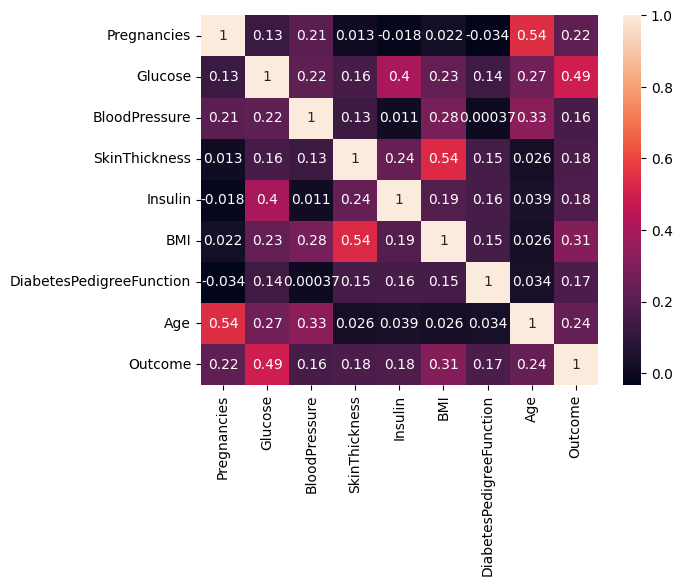

In [9]:
sns.heatmap(df.corr(),annot=True)

<Axes: >

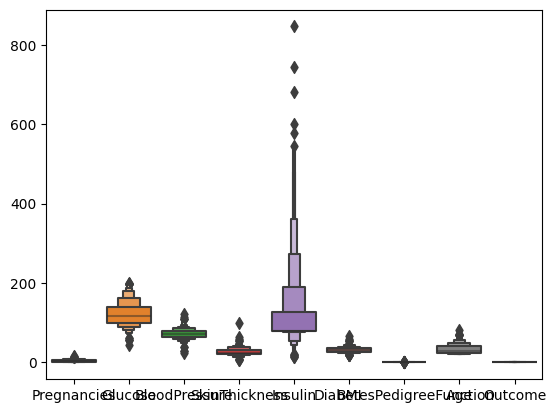

In [10]:
sns.boxenplot(df) # there is outliers so we scale down these values

In [11]:
# train test splite 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.20,random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

In [14]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# Model trainning
from sklearn.linear_model import LogisticRegression

In [16]:
classifier = LogisticRegression()

In [17]:
classifier.fit(X_train_scaled, y_train)

LogisticRegression()

In [18]:
y_pred = classifier.predict(X_test_scaled)

In [19]:
# confusion matrix, accuracy test, classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
      

[[88 11]
 [22 33]]
0.7857142857142857
              precision    recall  f1-score   support

           0       0.80      0.89      0.84        99
           1       0.75      0.60      0.67        55

    accuracy                           0.79       154
   macro avg       0.78      0.74      0.75       154
weighted avg       0.78      0.79      0.78       154



# now we can see our accuracy is 78% now we use GridSearchCV for increase accuracy

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
parameters = {'penalty':('l1', 'l2', 'elasticnet', None),
              'C':[1,10],
              'solver':('lbfgs','liblinear','newton-cg', 'newton-cholesky', 'sag', 'saga')}
clf = GridSearchCV(classifier, param_grid=parameters,cv=5)

In [22]:
clf.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 10],
                         'penalty': ('l1', 'l2', 'elasticnet', None),
                         'solver': ('lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga')})

In [33]:
clf.best_params_

{'C': 1, 'penalty': 'l1', 'solver': 'saga'}

In [38]:
classifier = LogisticRegression(C=1, penalty='l2',solver= 'saga')

In [39]:
classifier.fit(X_train_scaled,y_train)

LogisticRegression(C=1, solver='saga')

In [40]:
y_pred = classifier.predict(X_test_scaled)

In [41]:
# confusion matrix, accuracy test, classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[88 11]
 [22 33]]
0.7857142857142857
              precision    recall  f1-score   support

           0       0.80      0.89      0.84        99
           1       0.75      0.60      0.67        55

    accuracy                           0.79       154
   macro avg       0.78      0.74      0.75       154
weighted avg       0.78      0.79      0.78       154



In [ ]:
# save model into pikal file
import pickle

pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))